In [1]:
import numpy as np;
import xarray as xr;
import matplotlib.pyplot as plt;
import h5_reader_xr as reader;
import gysela_utilities as utils;

# Styling.
plt.style.use("bmh");

In [2]:
time_step = reader.fetch_data_from_h5("C:\\Workspace\\NSCC\\local copies\\h5 samples\\q1.5_trunc\\Phi2D_d00000.h5")["deltat"].values;
data_arrays = reader.compile_data_from_directory("Phirth_n0", "C:\\Workspace\\NSCC\\local copies\\h5 samples\\q1.5_trunc");

c:\Workspace\NSCC\GYSELA_utils\Post-Processing\Scripts\h5_reader_xr.py:18: UserWarning: The 'phony_dims' kwarg now defaults to 'access'. Previously 'phony_dims=None' would raise an error. For full netcdf equivalence please use phony_dims='sort'.
  dataset = xr.open_dataset(filepath, engine = "h5netcdf");
c:\Workspace\NSCC\GYSELA_utils\Post-Processing\Scripts\h5_reader_xr.py:18: UserWarning: The 'phony_dims' kwarg now defaults to 'access'. Previously 'phony_dims=None' would raise an error. For full netcdf equivalence please use phony_dims='sort'.
  dataset = xr.open_dataset(filepath, engine = "h5netcdf");
c:\Workspace\NSCC\GYSELA_utils\Post-Processing\Scripts\h5_reader_xr.py:18: UserWarning: The 'phony_dims' kwarg now defaults to 'access'. Previously 'phony_dims=None' would raise an error. For full netcdf equivalence please use phony_dims='sort'.
  dataset = xr.open_dataset(filepath, engine = "h5netcdf");
c:\Workspace\NSCC\GYSELA_utils\Post-Processing\Scripts\h5_reader_xr.py:18: UserWar

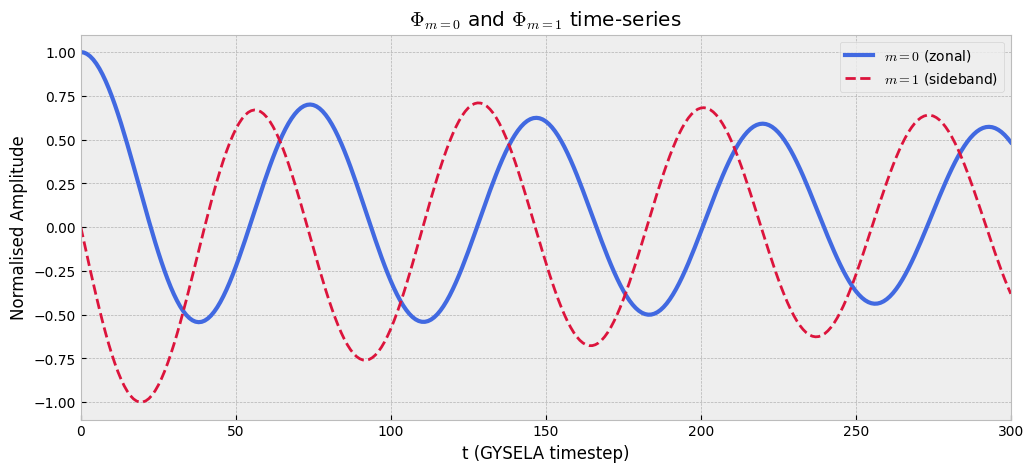

In [16]:
# Slicing around the mid-radius.
time_series_m0 = utils.generate_poloidally_averaged_time_series(data_arrays, m1 = False)[:, 35];
time_series_m1 = utils.generate_poloidally_averaged_time_series(data_arrays, m1 = True)[:, 35];

def plot_phase_lag(time_series_m0):

	time_series_m0_normalised = time_series_m0 / np.abs(time_series_m0).max();
	time_series_m1_normalised = time_series_m1 / np.abs(time_series_m1).max();
	plt.figure(figsize=(12, 5));
	plt.plot(time_series_m0_normalised, label=r"$m=0$ (zonal)", color = "royalblue", lw = 3);
	plt.plot(time_series_m1_normalised, label=r"$m=1$ (sideband)", color = "crimson", linestyle = "--");
	plt.title(r"$\Phi_{m = 0}$ and $\Phi_{m = 1}$ time-series");
	plt.xlabel("t (GYSELA timestep)");
	plt.ylabel("Normalised Amplitude");
	plt.legend();
	plt.xlim(0, 300);
	plt.show();

plot_phase_lag(time_series_m0);
